####***Prepare a detailed python notebook (similar tothis one) using Convolutional Neural Network for classifying the images from Fer.csv with the best accuracy***

## ***Import the libraries***

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D,Dropout, BatchNormalization, MaxPool2D, Flatten,Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,LearningRateScheduler
import matplotlib.pyplot as plt

In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


### **Prepare the dataset**

In [ ]:
#!unzip fer2013.csv.zip

In [ ]:
df=pd.read_csv('fer2013.csv')

In [ ]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
## target variable/ Dependent variable
y=df.iloc[:,0].values

### **Determing number of emotions(7 emotions in the dataset)**

In [ ]:
num_of_classes=len(set(y))
num_of_classes

7

In [ ]:
## Independent variable
x=df.iloc[:,1].values

In [ ]:
x.shape

(35887,)

In [ ]:
new_x=[]
for i in x:
  new_x.append(i.split(" "))

In [ ]:
x=np.array(new_x,'float32')

In [ ]:
x.shape

(35887, 2304)

In [ ]:
y=y.astype('float32')

In [ ]:
y

array([0., 0., 2., ..., 0., 3., 2.], dtype=float32)

In [ ]:
x

array([[ 70.,  80.,  82., ..., 106., 109.,  82.],
       [151., 150., 147., ..., 193., 183., 184.],
       [231., 212., 156., ...,  88., 110., 152.],
       ...,
       [ 17.,  17.,  16., ..., 154., 133., 113.],
       [ 30.,  28.,  28., ...,  35.,  30.,  28.],
       [ 19.,  13.,  14., ..., 189., 199., 201.]], dtype=float32)

In [ ]:
x[0]

array([ 70.,  80.,  82., ..., 106., 109.,  82.], dtype=float32)

### ***Normalize and Reshape the data***

In [ ]:
x = x.reshape(x.shape[0], 48, 48, 1)

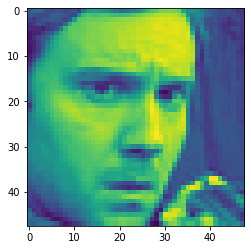

In [ ]:
temp=x[0]
plt.imshow(np.squeeze(temp))

In [ ]:
y[0]

0.0

## **Normalizing the data**

In [ ]:
x=x/255

In [ ]:
y=keras.utils.to_categorical(y,num_classes=7)

In [ ]:
x.shape

(35887, 48, 48, 1)

In [ ]:
x[0]

array([[[0.27450982],
        [0.3137255 ],
        [0.32156864],
        ...,
        [0.20392157],
        [0.16862746],
        [0.16078432]],

       [[0.25490198],
        [0.23921569],
        [0.22745098],
        ...,
        [0.21960784],
        [0.20392157],
        [0.17254902]],

       [[0.19607843],
        [0.16862746],
        [0.21176471],
        ...,
        [0.19215687],
        [0.21960784],
        [0.18431373]],

       ...,

       [[0.35686275],
        [0.25490198],
        [0.16470589],
        ...,
        [0.28235295],
        [0.21960784],
        [0.16862746]],

       [[0.3019608 ],
        [0.32156864],
        [0.30980393],
        ...,
        [0.4117647 ],
        [0.27450982],
        [0.18039216]],

       [[0.3019608 ],
        [0.28235295],
        [0.32941177],
        ...,
        [0.41568628],
        [0.42745098],
        [0.32156864]]], dtype=float32)

In [ ]:
y[0]

array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

### **Splitting into train and test using the train_test_split method**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

## ***Building the model***

In [ ]:
model= keras.Sequential()
model.add(Conv2D(64,(5,5),activation='relu',input_shape=(48,48,1)))
model.add(Conv2D(64,kernel_size= (5, 5), activation='relu')) 
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(5,5),activation='relu'))
model.add(Conv2D(128,(5,5),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(7,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 44, 44, 64)        1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 64)        102464    
_________________________________________________________________
batch_normalization (BatchNo (None, 40, 40, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       204928    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       409728    
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 128)       5

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [ ]:
#early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
# import math
# initial_learning_rate = 0.001
# def scheduler(epoch, lr):
#     drop_rate = 0.5
#     epochs_drop = 10.0
#     return initial_learning_rate * math.pow(drop_rate, math.floor(epoch/epochs_drop))

# lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [ ]:
#,callbacks=[reduce_lr,early_stop,lr_scheduler]

In [ ]:
history=model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
1010/1010 [==============================] - 43s 35ms/step - loss: 1.7393 - accuracy: 0.3103 - val_loss: 1.7980 - val_accuracy: 0.2889
Epoch 2/20
1010/1010 [==============================] - 34s 34ms/step - loss: 1.4667 - accuracy: 0.4319 - val_loss: 1.3732 - val_accuracy: 0.4795
Epoch 3/20
1010/1010 [==============================] - 34s 34ms/step - loss: 1.2993 - accuracy: 0.5035 - val_loss: 1.2946 - val_accuracy: 0.5010
Epoch 4/20
1010/1010 [==============================] - 34s 34ms/step - loss: 1.1953 - accuracy: 0.5490 - val_loss: 1.1854 - val_accuracy: 0.5517
Epoch 5/20
1010/1010 [==============================] - 34s 34ms/step - loss: 1.1133 - accuracy: 0.5778 - val_loss: 1.1566 - val_accuracy: 0.5612
Epoch 6/20
1010/1010 [==============================] - 34s 34ms/step - loss: 1.0205 - accuracy: 0.6149 - val_loss: 1.1728 - val_accuracy: 0.5723
Epoch 7/20
1010/1010 [==============================] - 34s 34ms/step - loss: 0.9313 - accuracy: 0.6512 - val_loss: 1.3024 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


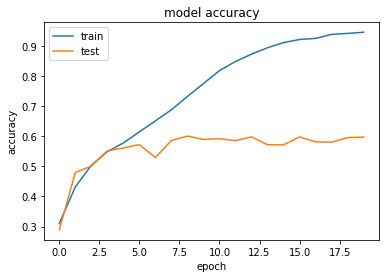

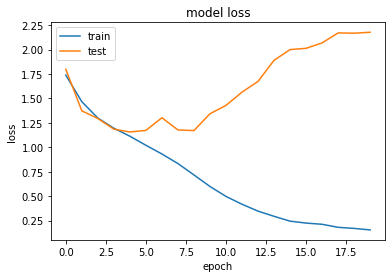

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## ***What parameters should be chosen to classify the images into various categories accurately?***


*   Number of Hidden Layers
*   Number of Hidden Neurons
*   Optimizer
*   Learning rate
*   Loss Function
*   Activation functions
*   Epochs
*   Batch Size







